In [1]:
"""
This program plot the risk narratives we found
20 July 2021
Author: Yuting Chen
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
# import the topic distribution for the model with k=20
test_type = 'history' # tweet, news, history
k = 20
dfname = "topic_distribution_"+test_type+str(k)+".xlsx"
df = pd.read_excel(dfname)

# aggregate the document-level data to daily data, can do it when necessary
# set date as index first, rename the topic of interest
df = df.set_index('date')
df = df.rename(columns={"topic20": "Risk Narratives"}, errors="raise")

df

FileNotFoundError: [Errno 2] No such file or directory: 'topic_distribution_history20.xlsx'

In [7]:
# import price and vix, for illustration, I am using data from yf here
import yfinance as yf
# ticker = '^VIX' # ^GSPC ^DJUSS ^DJI ^NDX
ticker = '^GSPC ^VIX'
df_index = yf.download(ticker, start="1980-01-01", end="2020-12-31")[['Close']] #"FTSEMIB.MI" Close
df_index.columns = ['SP500', 'VIX']
df_index

[*********************100%***********************]  2 of 2 completed


,SP500,VIX
Date,,
1980-01-02,105.760002,NaN
1980-01-03,105.220001,NaN
1980-01-04,106.519997,NaN
1980-01-07,106.809998,NaN
1980-01-08,108.949997,NaN
...,...,...
2020-12-23,3690.010010,23.309999
2020-12-24,3703.060059,21.530001
2020-12-28,3735.360107,21.700001


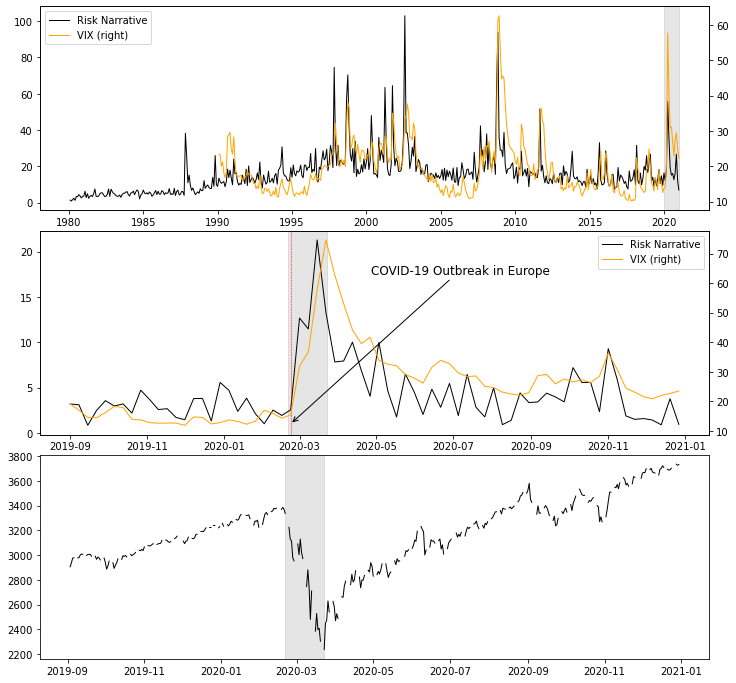

In [50]:
# First plot, plot the intensity index with VIX in the history, weekly
# plot a second graph on the same figure, the same but with a focus on 2020
# plot a third graph on the same figure, the S&P 500 index
# plot a fourth graph on the same figure, the S&P 500 index with a focus on 2020

# to mark the crash period
from datetime import datetime
crashstart = datetime(2020, 2, 21) 
crashend = datetime(2020, 3, 23)

# to mark the testing period
teststart = datetime(2020, 1, 1) 
testend = datetime(2020, 12, 31)

# to mark the focus period
focusstart = datetime(2019, 9, 1) 
focusend = datetime(2020, 12, 31)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,12))
fig.subplots_adjust(hspace=0.1)

# first graph
# prepare the dataframe
df_t = df.resample('M').sum()
df_t2 = df_index.resample('M').mean()
df_t = pd.concat([df_t['Risk Narratives'], df_t2.reindex(df_t.index)], axis=1)# t stands for temporary
lns1 = axes.flatten()[0].plot(df_t.index,df_t['Risk Narratives'], label="Risk Narrative",linewidth=1, color = 'black')
ax2 = axes.flatten()[0].twinx()
lns2 = ax2.plot(df_t.index,df_t['VIX'], label="VIX (right)",linewidth=1, color = "orange")
# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
axes.flatten()[0].legend(lns, labs)
# shadow the test period
axes.flatten()[0].axvspan(teststart, testend, alpha=0.2, color='grey')

# prepare dataframe for the second and third graph
df_t = df.resample('W').sum()
df_t = df_t[focusstart:focusend]

df_t2 = df_index.resample('W').mean()
df_t2 = df_t2[focusstart:focusend]
df_t = pd.concat([df_t['Risk Narratives'], df_t2.reindex(df_t.index)], axis=1)# t stands for temporary
lns1 = axes.flatten()[1].plot(df_t.index,df_t['Risk Narratives'], label="Risk Narrative",linewidth=1, color = 'black')
ax2 = axes.flatten()[1].twinx()
lns2 = ax2.plot(df_t.index,df_t['VIX'], label="VIX (right)",linewidth=1, color = "orange")
# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
axes.flatten()[1].legend(lns, labs)
# shadow the crash period 
axes.flatten()[1].axvspan(crashstart, crashend, alpha=0.2, color='grey')
# add one event
axes.flatten()[1].axvline(x=datetime(2020, 2, 23), linestyle='dashed', alpha=1, color = 'red',linewidth=0.5)
axes.flatten()[1].annotate('COVID-19 Outbreak in Europe',
                xy=(datetime(2020, 2, 23), np.max(df.iloc[:,0])),
                xytext=(80,150),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->"),
                fontsize=12)

# third graph
df_t = df_index.resample('D').mean()
df_t = df_t[focusstart:focusend]
axes.flatten()[2].plot(df_t.index,df_t['SP500'], label="SP500",linewidth=1, color = 'black')
# shadow the crash period 
axes.flatten()[2].axvspan(crashstart, crashend, alpha=0.2, color='grey')


path_output = "Output/"
fig.savefig(path_output+"Risk_Narratives.png")


